In [24]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    output_tensor = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    return model

In [25]:
model = create_model()
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 0 ~ 1 사이 값의 float32로 변환하는 작업
def get_preprocessed_data(images, labels):
    images = np.array(images, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1 사이값  float32로 변경하는 함수 호출한 뒤 OHE 적용
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    oh_labels = to_categorical(labels)  # one hot encoding
    return images, oh_labels

# 학습/검증/테스트 데이터 세트 전처리 및 OHE 적용한 뒤 반환

def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)
    

In [27]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
# Fashion MNIST 데이터 재로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) \
    = get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print((tr_images.shape, tr_oh_labels.shape), (val_images.shape, val_oh_labels.shape), (test_images.shape, test_oh_labels.shape))

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
((51000, 28, 28), (51000, 10)) ((9000, 28, 28), (9000, 10)) ((10000, 28, 28), (10000, 10))


In [28]:
from tensorflow.keras.optimizers import Adam
# Model 생성 및 optimizer, loss, metric 적용
# one hot encoding - categorical_crossentropy
# sparse categorical crossentropy

model = create_model()
model.summary()

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_16 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 학습수행
# epoch - 학습 횟수
# batch_size - 한 번에 들어갈 이미지 개수

history = model.fit(x=tr_images, y=tr_oh_labels, validation_data=(val_images, val_oh_labels), batch_size=128, epochs=20)

Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 13.4743 - accuracy: 0.6260 - val_loss: 1.3110 - val_accuracy: 0.7417
Epoch 2/20
399/399 [==============================] - 1s 2ms/step - loss: 0.9921 - accuracy: 0.7690 - val_loss: 0.8502 - val_accuracy: 0.7702
Epoch 3/20
399/399 [==============================] - 1s 2ms/step - loss: 0.6608 - accuracy: 0.8045 - val_loss: 0.6593 - val_accuracy: 0.8049
Epoch 4/20
399/399 [==============================] - 1s 2ms/step - loss: 0.5467 - accuracy: 0.8232 - val_loss: 0.5937 - val_accuracy: 0.8192
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4861 - accuracy: 0.8347 - val_loss: 0.5113 - val_accuracy: 0.8326
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4435 - accuracy: 0.8465 - val_loss: 0.4977 - val_accuracy: 0.8373
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4128 - accuracy: 0.8531 - val_loss: 0.4736 - val_accuracy: 0.8422
Epoch

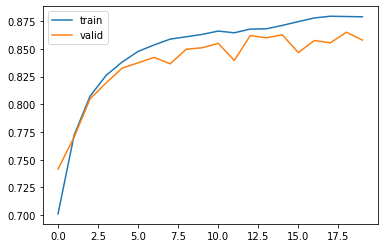

In [31]:
import matplotlib.pyplot as plt

def show_history(hisotry):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [32]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.8524


[0.44545575976371765, 0.852400004863739]

## Callback
- 주로 최적의 Learning rate를 Control하는데 사용
- customized를 할 수 있다..?

- ModelCheckpoint()
- ReduceLROnPlateau()
- LearningRateScheduler()
- EarlyStopping()
- TensorBoard()

#### ModelCheckpoint()
- 특정 조건에 맞춰서 모델을 파일로 저장

- filepath: filepath는 epoch의 값과 logs의 키로 채워진 이름 형식 옵션을 가질 수 있음, 예를 들어 filepath가 weight.{epoch:02d}-{val_loss:2f}.hdf5라면, 파일 이름에 세대번호와 검증 손실을 넣어 모델의 체크포인트가 저장
- monitor: 모니터할 지표(loss 또는 평가지표)
- save_best_only: 가장 좋은 성능을 나타내는 모델만 저장할 여부
- save_weights_only: Weights만 저장할지 여부, True로 하는게 좋음, model과 weight를 같이 저장하면 버그가 존재한다.
- model" {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 자동으로 유추.

In [33]:
!pwd

/kaggle/working


In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}={val_loss:.2f}.hdf5', monitor='val_loss',
                        save_best_only=True, save_weights_only=True, mode='min', period=3, verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=10, validation_data=(val_images, val_oh_labels), callbacks=[mcp_cb])

Epoch 1/10
399/399 [==============================] - 2s 3ms/step - loss: 7.8845 - accuracy: 0.2580 - val_loss: 1.7893 - val_accuracy: 0.3402
Epoch 2/10
399/399 [==============================] - 1s 2ms/step - loss: 1.5989 - accuracy: 0.4187 - val_loss: 1.1646 - val_accuracy: 0.5879
Epoch 3/10
399/399 [==============================] - 1s 2ms/step - loss: 1.0974 - accuracy: 0.5970 - val_loss: 1.0382 - val_accuracy: 0.6213

Epoch 00003: val_loss improved from inf to 1.03824, saving model to /kaggle/working/weights.03=1.04.hdf5
Epoch 4/10
399/399 [==============================] - 1s 2ms/step - loss: 0.9918 - accuracy: 0.6121 - val_loss: 0.9594 - val_accuracy: 0.6211
Epoch 5/10
399/399 [==============================] - 1s 2ms/step - loss: 0.9343 - accuracy: 0.6217 - val_loss: 0.9462 - val_accuracy: 0.6433
Epoch 6/10
399/399 [==============================] - 1s 2ms/step - loss: 0.8689 - accuracy: 0.6452 - val_loss: 0.8317 - val_accuracy: 0.7072

Epoch 00006: val_loss improved from 1.038

In [36]:
!ls -lia


total 4716
   786435 drwxr-xr-x 2 root root   4096 Jun 13 12:00  .
160838567 drwxr-xr-x 5 root root   4096 Jun 13 11:21  ..
   786437 ---------- 1 root root    263 Jun 13 11:21  __notebook_source__.ipynb
   786440 -rw-r--r-- 1 root root 343152 Jun 13 11:53 'weights.01=1.03.hdf5'
   786441 -rw-r--r-- 1 root root 343152 Jun 13 11:53 'weights.02=0.81.hdf5'
   786442 -rw-r--r-- 1 root root 343152 Jun 13 11:53 'weights.03=0.80.hdf5'
   786448 -rw-r--r-- 1 root root 343152 Jun 13 11:56 'weights.03=0.88.hdf5'
   786451 -rw-r--r-- 1 root root 343368 Jun 13 12:00 'weights.03=1.04.hdf5'
   786443 -rw-r--r-- 1 root root 343152 Jun 13 11:53 'weights.04=0.70.hdf5'
   786444 -rw-r--r-- 1 root root 343152 Jun 13 11:53 'weights.05=0.66.hdf5'
   786449 -rw-r--r-- 1 root root 343152 Jun 13 11:56 'weights.06=0.72.hdf5'
   786452 -rw-r--r-- 1 root root 343368 Jun 13 12:00 'weights.06=0.83.hdf5'
   786445 -rw-r--r-- 1 root root 343152 Jun 13 11:53 'weights.07=0.60.hdf5'
   786446 -rw-r--r-- 1 root root 343

#### ReduceLROnPlateau()
- 특정 epochs 횟수동안 선능이 개선 되지 않을 시 Learning rate를 동적으로 감소 시킴
- monitor:모니터할 지표(loss 또는 평가 지표)
- factor: 학습 속도를 줄인 인수. new_lr = lr * factor
- patience: Learning Rate를 줄이기 전에 monitor할 epochs 횟수.
- mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추

In [41]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels), callbacks=[rlr_cb])

Epoch 1/30
399/399 [==============================] - 2s 3ms/step - loss: 9.8176 - accuracy: 0.2119 - val_loss: 1.8372 - val_accuracy: 0.3484
Epoch 2/30
399/399 [==============================] - 1s 2ms/step - loss: 1.7665 - accuracy: 0.3428 - val_loss: 1.7120 - val_accuracy: 0.3618
Epoch 3/30
399/399 [==============================] - 1s 3ms/step - loss: 1.5954 - accuracy: 0.4123 - val_loss: 1.3330 - val_accuracy: 0.5319
Epoch 4/30
399/399 [==============================] - 1s 2ms/step - loss: 1.1916 - accuracy: 0.5513 - val_loss: 1.1241 - val_accuracy: 0.5622
Epoch 5/30
399/399 [==============================] - 1s 2ms/step - loss: 1.0582 - accuracy: 0.5774 - val_loss: 1.0763 - val_accuracy: 0.5806
Epoch 6/30
399/399 [==============================] - 1s 2ms/step - loss: 0.9955 - accuracy: 0.5945 - val_loss: 1.0483 - val_accuracy: 0.5771
Epoch 7/30
399/399 [==============================] - 1s 2ms/step - loss: 0.9591 - accuracy: 0.6012 - val_loss: 1.0336 - val_accuracy: 0.5917
Epoch 

#### EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

- 특정 epochs 동안 선능이 개선되지 않을 시 학습을 중단

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels), callbacks=[ely_cb])

Epoch 1/30
399/399 [==============================] - 1s 3ms/step - loss: 9.3046 - accuracy: 0.5013 - val_loss: 1.0821 - val_accuracy: 0.6558
Epoch 2/30
399/399 [==============================] - 1s 2ms/step - loss: 0.9390 - accuracy: 0.6962 - val_loss: 0.8698 - val_accuracy: 0.6848
Epoch 3/30
399/399 [==============================] - 1s 2ms/step - loss: 0.7672 - accuracy: 0.7065 - val_loss: 0.7513 - val_accuracy: 0.7299
Epoch 4/30
399/399 [==============================] - 1s 2ms/step - loss: 0.6717 - accuracy: 0.7323 - val_loss: 0.6971 - val_accuracy: 0.7421
Epoch 5/30
399/399 [==============================] - 1s 3ms/step - loss: 0.6293 - accuracy: 0.7443 - val_loss: 0.6824 - val_accuracy: 0.7654
Epoch 6/30
399/399 [==============================] - 1s 3ms/step - loss: 0.6126 - accuracy: 0.7564 - val_loss: 0.6567 - val_accuracy: 0.7636
Epoch 7/30
399/399 [==============================] - 1s 3ms/step - loss: 0.5813 - accuracy: 0.7707 - val_loss: 0.6251 - val_accuracy: 0.7633
Epoch 

In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, mode='min', verbose=1)
mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}={val_loss:.2f}.hdf5', monitor='val_loss',
                        save_best_only=True, save_weights_only=True, mode='min', period=3, verbose=0)

model.fit(x=tr_images,y=tr_oh_labels, validation_data=(val_images, val_oh_labels), batch_size=128, epochs=40, callbacks=[ely_cb, rlr_cb, mcp_cb])

Epoch 1/40
399/399 [==============================] - 1s 3ms/step - loss: 8.8934 - accuracy: 0.2979 - val_loss: 1.4996 - val_accuracy: 0.4352
Epoch 2/40
399/399 [==============================] - 1s 2ms/step - loss: 1.3526 - accuracy: 0.5092 - val_loss: 1.2825 - val_accuracy: 0.5179
Epoch 3/40
399/399 [==============================] - 1s 2ms/step - loss: 1.1838 - accuracy: 0.5630 - val_loss: 0.9848 - val_accuracy: 0.6268
Epoch 4/40
399/399 [==============================] - 1s 3ms/step - loss: 0.9614 - accuracy: 0.6405 - val_loss: 0.8605 - val_accuracy: 0.6789
Epoch 5/40
399/399 [==============================] - 1s 3ms/step - loss: 0.8224 - accuracy: 0.6866 - val_loss: 0.7622 - val_accuracy: 0.7182
Epoch 6/40
399/399 [==============================] - 1s 2ms/step - loss: 0.7265 - accuracy: 0.7139 - val_loss: 0.6892 - val_accuracy: 0.7277
Epoch 7/40
399/399 [==============================] - 1s 2ms/step - loss: 0.6754 - accuracy: 0.7305 - val_loss: 0.6604 - val_accuracy: 0.7397
Epoch 